# Лабораторная работа 3.10
### Отчет подготовил: Ярощук Владислав, M3208

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import polyfit, polyval
import sympy
from itertools import repeat

In [2]:
# Константы
C1 = 2.2e-8
C2 = 3.3e-8
C3 = 4.7e-8
C4 = 4.7e-7

L = 10e-3
freq = 40

R_critical = 1312

In [3]:
# Часть 1 - исходные данные
df = pd.DataFrame({'R' : list(range(0, 101, 10)) + [200, 300, 400],
                   'T' : list(repeat(9e-5, 14)),
                   '2Ui' : list(np.arange(2.7, 1.7, -0.1).round(3)) + [2, 1.6, 1.2],
                   '2Ui+n' : [1, 0.6, 1, 0.9, 0.75, 0.7, 0.6, 0.5, 0.4, 0.35, 0.3, 0.6, 0.3, 0.2], 
                   'n': [3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1] })
df['2Ui'] *= 2
df['2Ui+n'] *= 2

# Вычисляем значения логарифмического декремента
df['lambda'] = 1 / df['n'] * np.log(df['2Ui'] / df['2Ui+n'])
df

,R,T,2Ui,2Ui+n,n,lambda
0,0,0.00009,5.4,2.0,3,0.331084
1,10,0.00009,5.2,1.2,3,0.488779
2,20,0.00009,5.0,2.0,2,0.458145
3,30,0.00009,4.8,1.8,2,0.490415
4,40,0.00009,4.6,1.5,2,0.560296
5,50,0.00009,4.4,1.4,2,0.572566
6,60,0.00009,4.2,1.2,2,0.626381
7,70,0.00009,4.0,1.0,2,0.693147
8,80,0.00009,3.8,0.8,2,0.779072
9,90,0.00009,3.6,0.7,2,0.818804


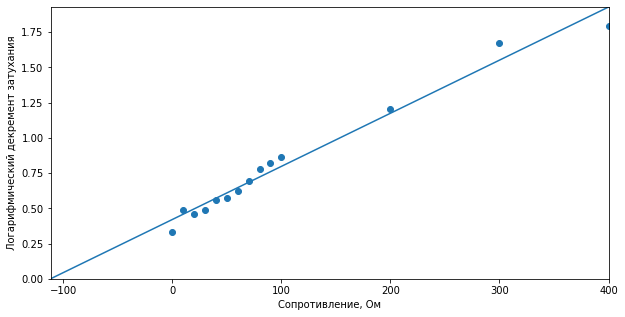

In [4]:
# Массивы исходных данных
lmb = np.array(df['lambda'])
r = np.array(df['R'])

# Аппроксимация
k, b = polyfit(r, lmb, 1)

# Построение графика
x = np.linspace(-b/k, 400, 1000)
fig, ax = plt.subplots(figsize=(10, 5))
ax.margins(0,0)
ax.scatter(r, lmb)
ax.set_ylabel('Логарифмический декремент затухания')
ax.set_xlabel('Сопротивление, Ом')
ax.plot(x, polyval([k, b], x))

In [5]:
# Собственное сопротивление контура
R0 = b/k
print('Собственное сопротивление контура, Ом: ', R0)

# Среднее значение индуктивности:
df['L'] = np.pi**2 * C1 * (R0 + df['R'])**2 / df['lambda']
print('Среднее значение индуктивности, мГн: ', df['L'].mean()*1e3)
df

Собственное сопротивление контура, Ом:  111.59671383832352
Среднее значение индуктивности, мГн:  12.4704303369078


,R,T,2Ui,2Ui+n,n,lambda,L
0,0,0.00009,5.4,2.0,3,0.331084,0.008167
1,10,0.00009,5.2,1.2,3,0.488779,0.006568
2,20,0.00009,5.0,2.0,2,0.458145,0.008207
3,30,0.00009,4.8,1.8,2,0.490415,0.008877
4,40,0.00009,4.6,1.5,2,0.560296,0.008906
5,50,0.00009,4.4,1.4,2,0.572566,0.009903
6,60,0.00009,4.2,1.2,2,0.626381,0.010207
7,70,0.00009,4.0,1.0,2,0.693147,0.010330
8,80,0.00009,3.8,0.8,2,0.779072,0.010231
9,90,0.00009,3.6,0.7,2,0.818804,0.010777


In [6]:
# Теоретические значения периода
def getT(L, C, R):
         return 2*np.pi/np.sqrt(1/(L*C) - R**2 / (4*L**2))
         
print('Значение периода при R = 0, с:', getT(df.loc[df['R'] == 0]['L'].mean(), C1, 0 + R0))
print('Значение периода при R = 200, с:', getT(df.loc[df['R'] == 200]['L'].mean(), C1, 200 + R0))
print('Значение периода при R = 400, с:', getT(df.loc[df['R'] == 400]['L'].mean(), C1, 400 + R0))

Значение периода при R = 0, с: 8.45791965892548e-05
Значение периода при R = 200, с: 0.00012524556917867173
Значение периода при R = 400, с: 0.00016987378683587845


In [7]:
# Расчитываем значения добротности:
df['Q'] = 2*np.pi / (1-np.exp(-2*df['lambda']))
df

,R,T,2Ui,2Ui+n,n,lambda,L,Q
0,0,0.00009,5.4,2.0,3,0.331084,0.008167,12.974606
1,10,0.00009,5.2,1.2,3,0.488779,0.006568,10.072899
2,20,0.00009,5.0,2.0,2,0.458145,0.008207,10.471976
3,30,0.00009,4.8,1.8,2,0.490415,0.008877,10.053096
4,40,0.00009,4.6,1.5,2,0.560296,0.008906,9.323436
5,50,0.00009,4.4,1.4,2,0.572566,0.009903,9.215338
6,60,0.00009,4.2,1.2,2,0.626381,0.010207,8.796459
7,70,0.00009,4.0,1.0,2,0.693147,0.010330,8.377580
8,80,0.00009,3.8,0.8,2,0.779072,0.010231,7.958701
9,90,0.00009,3.6,0.7,2,0.818804,0.010777,7.799816


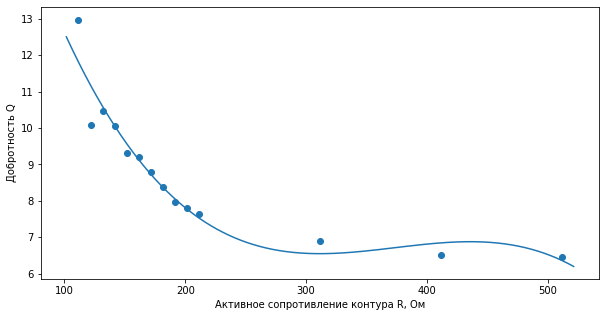

In [8]:
# Строим график Q(R)
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_ylabel('Добротность Q')
ax.set_xlabel('Активное сопротивление контура R, Ом')

x = np.linspace(df['R'].min() + R0 - 10, df['R'].max() + R0 + 10, 1000)

# Построение графика T(C1) эксп

ax.scatter(df['R'] + R0, df['Q'])
k, k1, k2, k3 = polyfit(df['R'] + R0, df['Q'], 3)
ax.plot(x, polyval([k, k1, k2, k3], x))

In [9]:
# Расчитываем значение критического сопротивления:
R_critical_calc = 2 * np.sqrt(L / C1)
print('Критическое сопротивление, теор., Ом: ', R_critical_calc)
print('Критическое сопротивление, эксп., Ом: ', R_critical)

Критическое сопротивление, теор., Ом:  1348.3997249264842
Критическое сопротивление, эксп., Ом:  1312


In [10]:
print('Конечный вид Таблицы 1')
df

Конечный вид Таблицы 1


,R,T,2Ui,2Ui+n,n,lambda,L,Q
0,0,0.00009,5.4,2.0,3,0.331084,0.008167,12.974606
1,10,0.00009,5.2,1.2,3,0.488779,0.006568,10.072899
2,20,0.00009,5.0,2.0,2,0.458145,0.008207,10.471976
3,30,0.00009,4.8,1.8,2,0.490415,0.008877,10.053096
4,40,0.00009,4.6,1.5,2,0.560296,0.008906,9.323436
5,50,0.00009,4.4,1.4,2,0.572566,0.009903,9.215338
6,60,0.00009,4.2,1.2,2,0.626381,0.010207,8.796459
7,70,0.00009,4.0,1.0,2,0.693147,0.010330,8.377580
8,80,0.00009,3.8,0.8,2,0.779072,0.010231,7.958701
9,90,0.00009,3.6,0.7,2,0.818804,0.010777,7.799816


In [11]:
# Часть 2 - исходные данные
df2 = pd.DataFrame({'C' : [C1, C2, C3, C4],
                   'T' : [9e-5, 1.1e-4, 1.3e-4, 2.25e-4]})

# Вычисление остальных значений таблицы 2
df2['T_th'] = getT(L, df2['C'], R0)
df2['T_thompson'] = 2*np.pi*np.sqrt(L * df2['C'])
df2['dT_th'] = np.abs(df2['T'] - df2['T_th']) / df2['T_th'] * 100
df2['dT_th_thompson'] = np.abs(df2['T'] - df2['T_thompson']) / df2['T_thompson'] * 100

print('Таблица 2')
df2

Таблица 2


,C,T,T_th,T_thompson,dT_th,dT_th_thompson
0,2.200000e-08,0.000090,0.000094,0.000093,3.759292,3.427983
1,3.300000e-08,0.000110,0.000115,0.000114,4.123263,3.626896
2,4.700000e-08,0.000130,0.000137,0.000136,5.264335,4.563489
3,4.700000e-07,0.000225,0.000466,0.000431,51.738801,47.765948


## Вывод
Мы изучили явление свободных затухающих электромагнитных колебаний, для различных конфигураций ёмкостей и сопротивлений расчитали декремент затухания колебаний и добротность контура, построили соответствующие графики зависимости. Для одной из конфигурация измерили, а также расчитали значение критического сопротивления, для различных значений ёмкости измерили периоды колебаний, расчитали соответствующие теоретические значения периодов, оценили отклонение.